## Package Load

In [1]:
from module import animeGAN2, model_rs50, keyword, orb_knn
from module import option_1, option_2

import PIL
from PIL import Image
from keras.preprocessing import image as keras_image

from tqdm.notebook import tqdm

import pandas as pd
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2022-07-30 13:38:18.574241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-30 13:38:18.576487: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-30 13:38:18.578410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Data & model Load

In [2]:
actor_keyword_df = pd.read_excel('./text_data/Actor_keywords_test.xlsx')
webtoon_keyword_df = pd.read_excel('./text_data/Webtoon_keywords_test.xlsx')
keyword_score_table = pd.read_excel('./text_data/Keyword_score_table_test.xlsx')

model_gan = animeGAN2.AnimeGAN()
model_RS = model_rs50.RN50()
model_key = keyword.Keyword('./model/fasttext.model')
model_ORB = orb_knn.OrbKNN()

option_1_func = option_1.User(webtoon_keyword_df, actor_keyword_df, keyword_score_table, model_ORB, model_RS)
option_2_func = option_2.User(webtoon_keyword_df, model_ORB, model_key, model_RS, model_gan)

Using cache found in /home/lab22/.cache/torch/hub/bryandlee_animegan2-pytorch_main
Using cache found in /home/lab22/.cache/torch/hub/bryandlee_animegan2-pytorch_main
2022-07-30 13:38:31.730729: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-30 13:38:31.731164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-30 13:38:31.735148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-30 13:38:31.737852

## Run Function

In [3]:
def terminate():
    global RUN
    RUN = False

## Run

1. 사용자의 옵션 선택
- option 1 : 웹툰과 등장인물을 선택하여 데이터베이스에 존재하는 배우들과 비교하여 배우 추천
- option 2 : 사용자가 사용자의 사진을 upload하여 선택한 웹툰의 등장인물과 비교

In [4]:
RUN = True
option_list = [option_1_func.recommend_actor, option_2_func.run_option_2, terminate]


========== 웹툰 배우 추천 시스템 ==========
1. 배우 추천
2. 사용자 입력
3. 종료

>>> 번호를 입력하세요 : 1

========================= 웹툰 제목 선택 =========================
1. 폭풍의전학생           2. 모태솔로수용소          3. 죽음에관하여           
4. 심연의하늘            5. 웃지않는개그반          6. 간 떨어지는 동거        
7. 상중하              8. 싸우자귀신아           9. 요리GO             
10. 사이드킥            11. 낮에 뜨는 달         12. 이제 곧 죽습니다       
13. 구구까까            14. 완벽한 허니문         15. 다이스(DICE)       
16. 엽총소년            17. 한림체육관           18. 입시명문사립 정글고등학교   
19. 투명한 동거          20. 컨트롤제트           21. 미래소녀            
22. 윈터우즈            23. Ho!             24. 미라클! 용사님        
25. 목욕의 신           26. 열렙전사            27. 손의 흔적           
28. 핑크레이디           29. 유미의 세포들         30. 스피릿 핑거스         
31. 하이브 1~2         32. 오!주예수여          33. 악의는 없다          
34. 공복의 저녁식사        35. 더 복서            36. 후레자식            
37. 용이산다            38. 밥 먹고 갈래요?       39. 내 ID는 강남미인!     
40. 슈퍼 시크릿          41. 스퍼맨 시즌1         42. 소녀더와일즈          
43. 

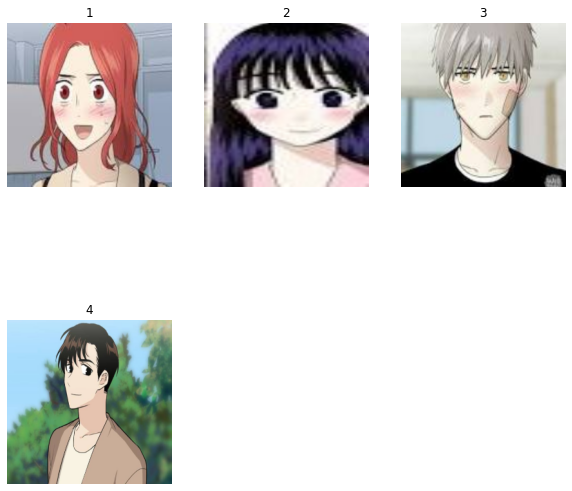



>>> 번호를 입력하세요 : 3

============== 나이 범위 지정 ==============
 * 숫자로만 입력하세요.

>>> 최소 나이 입력: 20
>>> 최대 나이 입력: 30

============= 추천받을 배우의 수 지정 =============
* 필터링된 배우의 최대 수 : 60

>>> 추천받을 배우의 수 : 6


  0%|          | 0/60 [00:00<?, ?it/s]

=================== << 결과 >> ===================
* 점수 산정 : 키워드 30.0%, 이미지 70.0%


  0%|          | 0/6 [00:00<?, ?it/s]

배우 이름 : 윤찬영
배우 나이 : 21
배우 성별 : 남


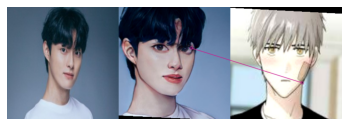

Character Keywords : 미안하다, 부족하다, 상당하다, 수상하다, 의하다
Actor keywords : 수상하다, 나란하다, 훌륭하다, 꾸준하다, 작다

Keyword Similarity     : 91.77%
Image Similarity       : 80.86%
** Total Similarity ** : 84.13%
배우 이름 : 육성재
배우 나이 : 27
배우 성별 : 남


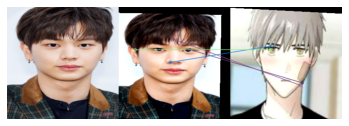

Character Keywords : 미안하다, 부족하다, 상당하다, 수상하다, 의하다
Actor keywords : 진정하다, 꾸준하다, 굉장하다, 평범하다, 철저하다

Keyword Similarity     : 93.29%
Image Similarity       : 80.01%
** Total Similarity ** : 83.99%
배우 이름 : 조병규
배우 나이 : 26
배우 성별 : 남


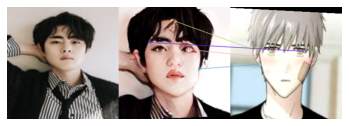

Character Keywords : 미안하다, 부족하다, 상당하다, 수상하다, 의하다
Actor keywords : 꼬장꼬장하다, 불과하다, 급하다, 꾸준하다, 정확하다

Keyword Similarity     : 94.47%
Image Similarity       : 78.1%
** Total Similarity ** : 83.01%
배우 이름 : 백현
배우 나이 : 30
배우 성별 : 남


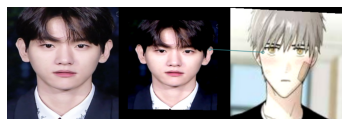

Character Keywords : 미안하다, 부족하다, 상당하다, 수상하다, 의하다
Actor keywords : 급하다, 담담하다, 어떠하다, 완전하다, 신중하다

Keyword Similarity     : 95.23%
Image Similarity       : 77.62%
** Total Similarity ** : 82.9%
배우 이름 : 서영주
배우 나이 : 24
배우 성별 : 남


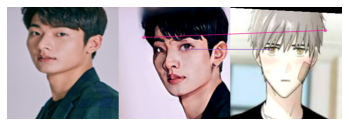

Character Keywords : 미안하다, 부족하다, 상당하다, 수상하다, 의하다
Actor keywords : 아름답다, 힘드다, 자세하다, 성공하다, 뛰어나다

Keyword Similarity     : 86.54%
Image Similarity       : 80.53%
** Total Similarity ** : 82.33%
배우 이름 : 신재하
배우 나이 : 29
배우 성별 : 남


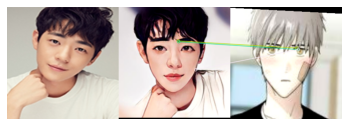

Character Keywords : 미안하다, 부족하다, 상당하다, 수상하다, 의하다
Actor keywords : 유명하다, 어색하다, 유일하다, 감미롭다, 충분하다

Keyword Similarity     : 83.98%
Image Similarity       : 81.12%
** Total Similarity ** : 81.98%

========== 웹툰 배우 추천 시스템 ==========
1. 배우 추천
2. 사용자 입력
3. 종료

>>> 번호를 입력하세요 : 2

========================= 웹툰 제목 선택 =========================
1. 폭풍의전학생           2. 모태솔로수용소          3. 죽음에관하여           
4. 심연의하늘            5. 웃지않는개그반          6. 간 떨어지는 동거        
7. 상중하              8. 싸우자귀신아           9. 요리GO             
10. 사이드킥            11. 낮에 뜨는 달         12. 이제 곧 죽습니다       
13. 구구까까            14. 완벽한 허니문         15. 다이스(DICE)       
16. 엽총소년            17. 한림체육관           18. 입시명문사립 정글고등학교   
19. 투명한 동거          20. 컨트롤제트           21. 미래소녀            
22. 윈터우즈            23. Ho!             24. 미라클! 용사님        
25. 목욕의 신           26. 열렙전사            27. 손의 흔적           
28. 핑크레이디           29. 유미의 세포들         30. 스피릿 핑거스         
31. 하이브 1~2         32. 오!주예수여          33. 악의는 없다      

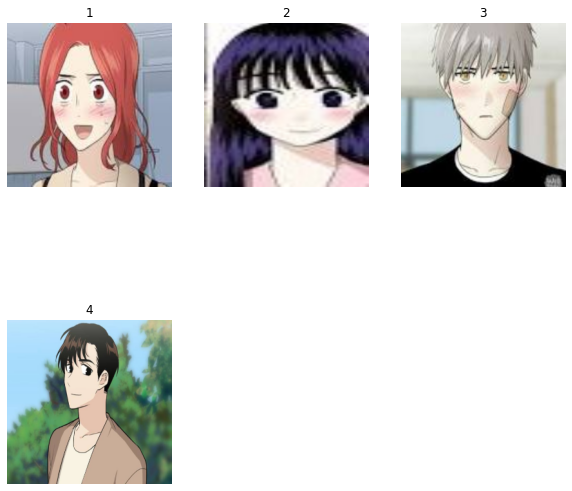



>>> 번호를 입력하세요 : 1

============= 선택된 등장인물 =============


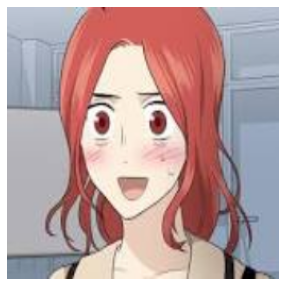


=============== 사진 업로드 ===============
* 사진은 jpg 형식으로 올려주세요.
>>> 입력(현재는 경로로 대체) : ./임수향


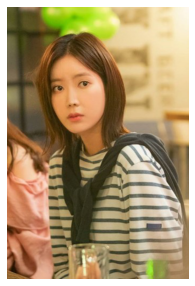


================= 키워드 입력 =================
* 키워드는 반드시 하나이상 입력해야한다.
* 키워드를 여러개 입력할 때, 구분자는 ", "이다.
* 예시) 바보같다, 사랑스럽다, 둔하다

>>> 입력(구분자는 ",") : 착하다, 여리다, 예쁘다

=================== << 결과 >> ===================


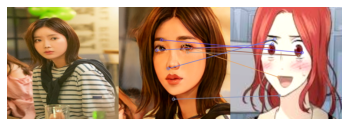

Character keywords : 부러워하다, 반하다, 피곤하다, 의하다, 인하다
User keywords : 착하다, 여리다, 예쁘다

Keyword Similarity : 72.33%
Image Similarity : 78.71%

Total Similarity : 76.8%

========== 웹툰 배우 추천 시스템 ==========
1. 배우 추천
2. 사용자 입력
3. 종료

>>> 번호를 입력하세요 : 3
시스템이 종료됩니다.


In [7]:
while RUN:
    select_option = int(input(f'''
{'=' * 10} 웹툰 배우 추천 시스템 {'=' * 10}
1. 배우 추천
2. 사용자 입력
3. 종료
{'=' * 43}

>>> 번호를 입력하세요 : '''))
    
    option_list[select_option - 1]()
else:
    print("시스템이 종료됩니다.")
    RUN = True

- 보완점
    1. 이미지 매칭선을 조정필요(최종발표할때)
    2. 사용자 이미지 변화과정 보여주고 괜찮으면 사용.
    3. 배우, 웹툰 키워드 최소 5개로 추가하기.